https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/micrograd

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

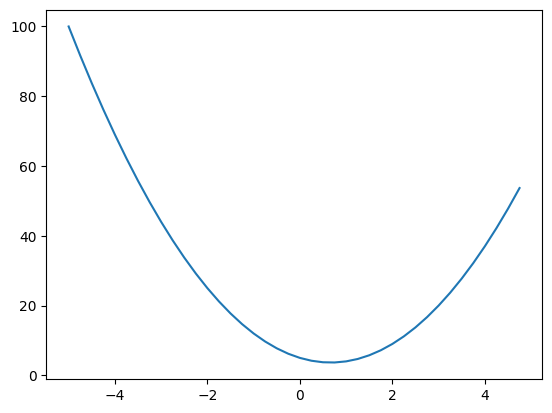

In [ ]:
plt.plot(xs,ys)


In [ ]:
h= 0.000000000001
x = 3.0
(f(x+h)-f(x))/h

14.001244608152774

In [ ]:
# slope negative lets say = -3
h= 0.000000000001
x = -3.0
(f(x+h)-f(x))/h

-21.9984030991327

Slope tends to 0 at h= 0.000001 and x = 2/3


In [ ]:
h= 0.000001
x = 2/3
(f(x+h)-f(x))/h

2.999378523327323e-06

In [ ]:
## lets get little more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


Derivative of d w.r.t a,b, and c

In [ ]:
h = 0.0001
# inputs
a = 2.0
b = -3.0
c = 10.0

# d1
d1 = a*b+c
a+=h
d2 =a*b+c
print('d1',d1)
print('d2',d2)
print('slope ', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope  -3.000000000010772


In [ ]:
# differentiating with respect to b
h = 0.0001
# inputs
a = 2.0
b = -3.0
c = 10.0

# d1
d1 = a*b+c
b+=h
d2 =a*b+c
print('d1',d1)
print('d2',d2)
print('slope ', (d2-d1)/h)

d1 4.0
d2 4.0002
slope  2.0000000000042206


In [ ]:
# differentiating with respect to c
h = 0.0001
# inputs
a = 2.0
b = -3.0
c = 10.0

# d1
d1 = a*b+c
c+=h
d2 =a*b+c
print('d1',d1)
print('d2',d2)
print('slope ', (d2-d1)/h)

d1 4.0
d2 4.0001
slope  0.9999999999976694


We will write a classs which store all those values of derivatives. Below class Value take a scalar value and return a message through __repr__ value(data = corresponding value passed to the value class)

In [ ]:
class Value:

  def __init__(self,data):
    self.data = data

  def __repr__(self) -> str:
    return f"value(data = {self.data})"

a= Value(2.0)
b = Value(-3.0)
a+b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

currently it donot know how to add the two value objects. So we have to tell it.

In [ ]:
class Value:

  def __init__(self,data):
    self.data = data

  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data)
    return out

a= Value(2.0)
b = Value(-3.0)
# internally it will call a.__add__(b)
a+b

__repr__ provide us nicer looking expression. lets add multiply too.

In [ ]:
class Value:

  def __init__(self,data):
    self.data = data

  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data)
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data)
    return out

a= Value(2.0)
b = Value(-3.0)
c = Value(10.0)
# internally it will call a.__mul__(b)
a*b

In [ ]:
class Value:

  def __init__(self,data):
    self.data = data

  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data)
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data)
    return out

a= Value(2.0)
b = Value(-3.0)
c = Value(10.0)
# internally it will call a.__mul__(b)
a*b + c
# (a.__mul__(b)).__add__(c)

In [ ]:
# for efficiency we are storing in a set
class Value:

  def __init__(self,data, _children= ()): # _children will be empty touple
    self.data = data
    self._prev = set(_children) # _prev will be empty set

  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data, (self, other))
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data,(self, other))
    return out

a= Value(2.0)
b = Value(-3.0)
c = Value(10.0)
# internally it will call a.__mul__(b)
d= a*b + c
d


In [ ]:
d._prev  # in this now through _prev we know the operation values, i.e. a*b = 2.0 * -3.0 = -6.0 and  c= 10

But we don't know what is the operation. So lets add _op

In [ ]:
# for efficiency we are storing in a set
class Value:

  def __init__(self,data, _children= (), _op=''): # _op is empty string
    self.data = data
    self._prev = set(_children)
    self._op = _op

  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data, (self, other),'+')
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data,(self, other),'*')
    return out

a= Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d= a*b + c
d


In [ ]:
d._prev

In [ ]:
d._op

In [ ]:
## Now lets make the graph using the graphviz

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [ ]:
draw_dot(d)

In [ ]:
# lets add labels to each variables
# for efficiency we are storing in a set
class Value:

  def __init__(self,data, _children= (), _op='', label=''): # _op is empty string
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label =label

  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data, (self, other),'+')
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data,(self, other),'*')
    return out

a= Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label = 'c')
e= a*b; e.label = 'e'
d= e + c ; d.label = 'd'
d


In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [ ]:
draw_dot(d)

In [ ]:
## lets add other things to the graph or expression little big
# lets add labels to each variables
# for efficiency we are storing in a set
class Value:

  def __init__(self,data, _children= (), _op='', label=''): # _op is empty string
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label =label

  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data, (self, other),'+')
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data,(self, other),'*')
    return out

a= Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label = 'c')
e= a*b; e.label = 'e'
d= e + c ; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L # final output is L


In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [ ]:
draw_dot(L) # this is our forward pass

## Now we would like do the backpropagation --> We will add the gradient i.e. grad. Initially we will have 0 grad i.e. it won't effect anything

In [1]:
class Value:

  def __init__(self,data, _children= (), _op='', label=''): # _op is empty string
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label =label


  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data, (self, other),'+')
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data,(self, other),'*')
    return out

a= Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label = 'c')
e= a*b; e.label = 'e'
d= e + c ; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L # final output is L

value(data = -8.0)

In [2]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

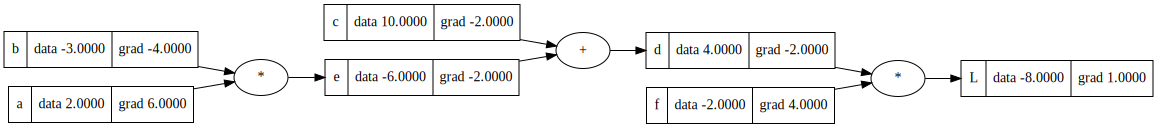

In [9]:
draw_dot(L)

In [4]:
L.grad = 1.0

In [ ]:
# So we have L = d*f
# we have to find dL/dd = f ( from calculas)

But we can also drive it : /n
(f(x+h)- f(x))/ h
so increasing the d+h
L = d*f
f= d*f
((d+h)*f - (d*f))/h = (d*f + hf -d*f) /h = hf /h = f

In [8]:
# so we have dL/dd = f = -2.0
# also we have dL/df = d = 4.0
d.grad = -2.0
f.grad = 4.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0*-3.0
b.grad = -2.0*2.0

In [11]:
## If we want to up the value of L i.e -8 towards -7 we need to increase the grad value little bit i.e lets take a step size of 0.01
# so lets modify :
a.data += 0.01*a.grad
b.data += 0.01*b.grad
c.data += 0.01*c.grad
f.data += 0.01*f.grad



e= a*b
d= e + c
L = d*f
print(L.data)


-6.586368000000001


In [6]:
def lol():
  h = 0.0001
  a= Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label = 'c')
  e= a*b; e.label = 'e'
  d= e + c ; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d*f; L.label = 'L'
  L1 = L.data

  a= Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label = 'c')
  e= a*b; e.label = 'e'
  d= e + c ; d.label = 'd'
  d.data +=h
  f = Value(-2.0 , label = 'f')
  L = d*f; L.label = 'L'
  L2 = L.data

  print('%0.4f' % ((L2 - L1)/h))

lol()

-2.0000


we have dL/de = -2.0
 e = a*b
 de/da = b
 de/db = a

dL/da = (dL/de) * (Local gradient i.e. de/da)
dL/da = -2.0 * b = -2.0 * -3.0 = 6.0
dL/db = dL/de*de/db = -2.0 * a = -2.0 * 2.0 = -4.0